In [3]:
library(pastecs)
library(ggpubr)

In [4]:
# Loading the 'trees' dataset and getting basic stats:
# mean, median, 25th and 75th quartiles, min, max
data(trees)
trees <- trees[complete.cases(trees), ]  # or, na.omit(df)
summary(trees)  # stat.desc(trees) Will provide a detailed list of statistical properties

     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

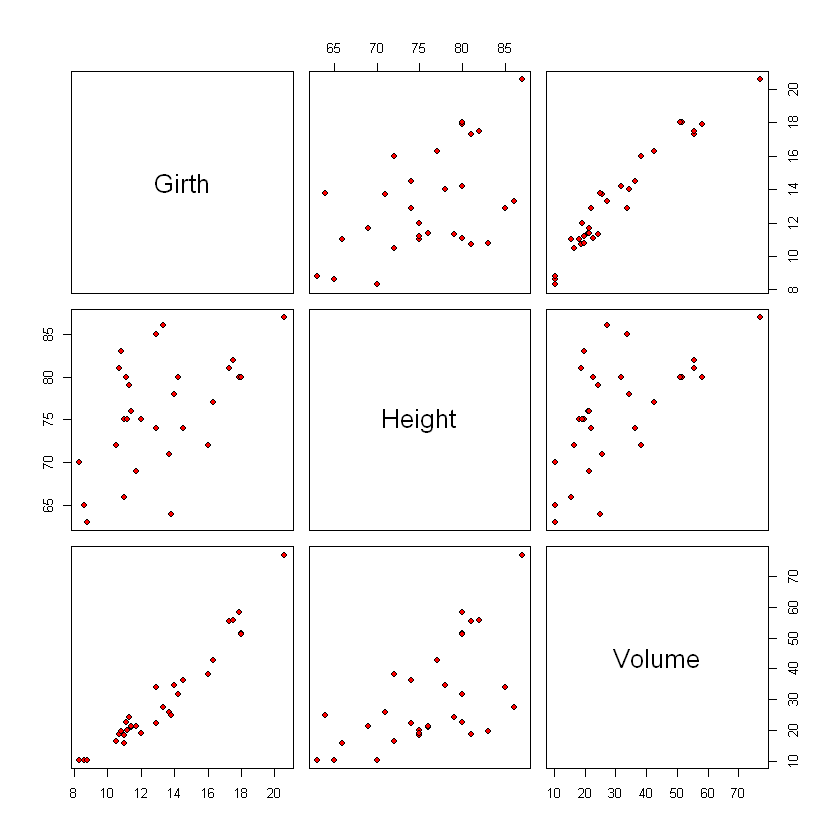

In [5]:
# pairwise distribution of the features
pairs(trees, pch = 21, bg = c("red"))

In [7]:
#par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
#ggboxplot(trees, y='Girth', main='Distribution of the girth measurements in trees dataset', width=0.1, orientation = "horizontal")
#gghistogram(trees, x = "Girth", bins = 9, add = "mean")
#ggecdf(trees, x = "Girth")

In [6]:
# Standard deviation and IQR are the two most common measures used to report the variability of the data
sapply(trees, sd)
quantile(trees$Girth)
IQR(trees$Girth)

Girth    Height    Volume 
 3.138139  6.371813 16.437846

0%   25%   50%   75%  100% 
 8.30 11.05 12.90 15.25 20.60

[1] 4.2

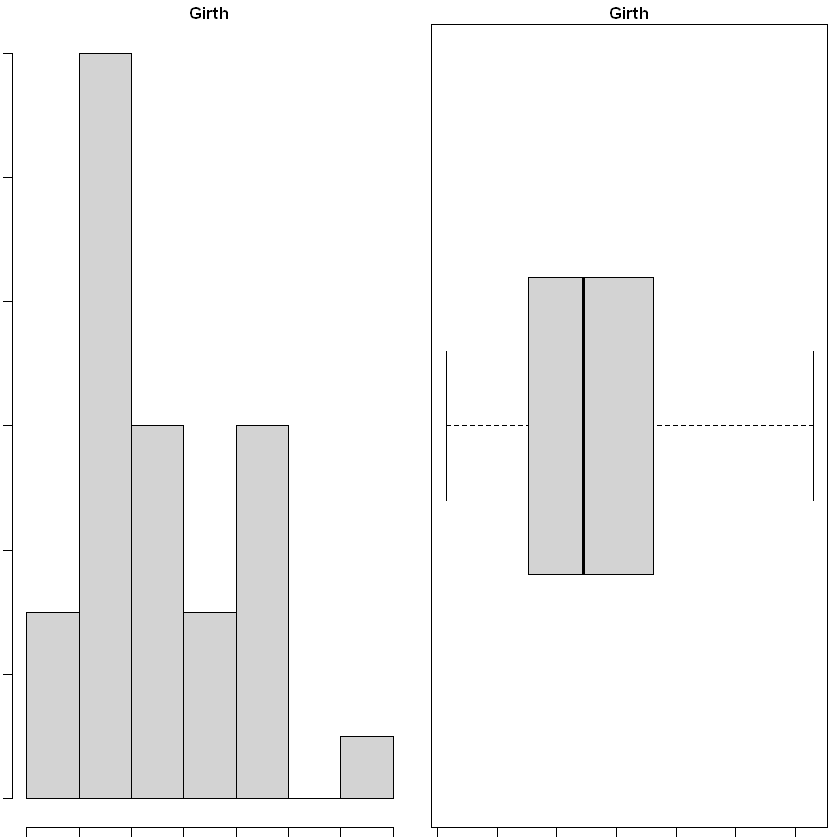

In [14]:
par(mfrow=c(1,2))
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
layout(matrix(c(1,2), 2,2, byrow = TRUE), widths = c(2,2), heights = 0.5)
hist(trees$Girth, main='Girth')
boxplot(trees$Girth, main='Girth', horizontal = TRUE)